In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)

from numpy import average

import matplotlib.pyplot as plt

plt.style.use('ggplot')

/home/mcanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EMDA version is: 1.0.0a4


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [3]:
emda = EMDA(parameters=parameters, trajectory=trajectory, fix_jump=True)

Trajectory has been loaded!


In [4]:
emda.load_variant(parameters, trajectory)

V2 variant has been loaded!


In [5]:
emda.load_trajectory(trajectory)
emda.load_trajectory(trajectory, variant_name='V1')
emda.load_trajectory(trajectory)

A new replica has been loaded to variant V2!
A new replica has been loaded to variant V1!
A new replica has been loaded to variant V2!


In [5]:
emda.universe

{'V1': {'R1': <Universe with 79250 atoms>},
 'V2': {'R1': <Universe with 79250 atoms>}}

# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [6]:
emda.select('C10', 'C10', sel_type='at_name',)
emda.select('C11', 'C11', sel_type='at_name',)
emda.select('C12', 'C12', sel_type='at_name',)
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name',)
emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

#subs = emda.universe.select_atoms('resid 666')
emda.select('subs', 666, sel_type='res_num')

print(emda.selections)

{'C10': 'name C10', 'C11': 'name C11', 'C12': 'name C12', 'C13': 'name C13', 'C14': 'name C14', 'H12': 'name H12A or name H12B', 'cof': 'bynum 10597', 'COO': 'bynum 10599 or bynum 10600 or bynum 10601', 'subs': 'resid 666'}


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [7]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
#emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=False, measure_distances=True)
#emda.add_protein_contacts('contacts_prot', sel_env=3, measure_distances=True)
#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
#emda.add_RMSD('RMSD_subs', 'subs', weights='mass')

## Run the measurements

In [8]:
print(emda.measures)

{'dist_H12': Measure dataclass with:
	Name:   dist_H12
	Type:   distance
	Sel:    ['cof', 'H12']
	Status: 
		V1, R1: Not calculated
		V2, R1: Not calculated
, 'angle_C11C12C13': Measure dataclass with:
	Name:   angle_C11C12C13
	Type:   angle
	Sel:    ['C11', 'C12', 'C13']
	Status: 
		V1, R1: Not calculated
		V2, R1: Not calculated
, 'dihe_C10C11C13C14': Measure dataclass with:
	Name:   dihe_C10C11C13C14
	Type:   dihedral
	Sel:    ['C10', 'C11', 'C13', 'C14']
	Status: 
		V1, R1: Not calculated
		V2, R1: Not calculated
}


In [9]:
emda.run()

Variants: 100%|██████████| 2/2 [00:01<00:00,  1.38var/s]


emda.measures['dist_H12'].result

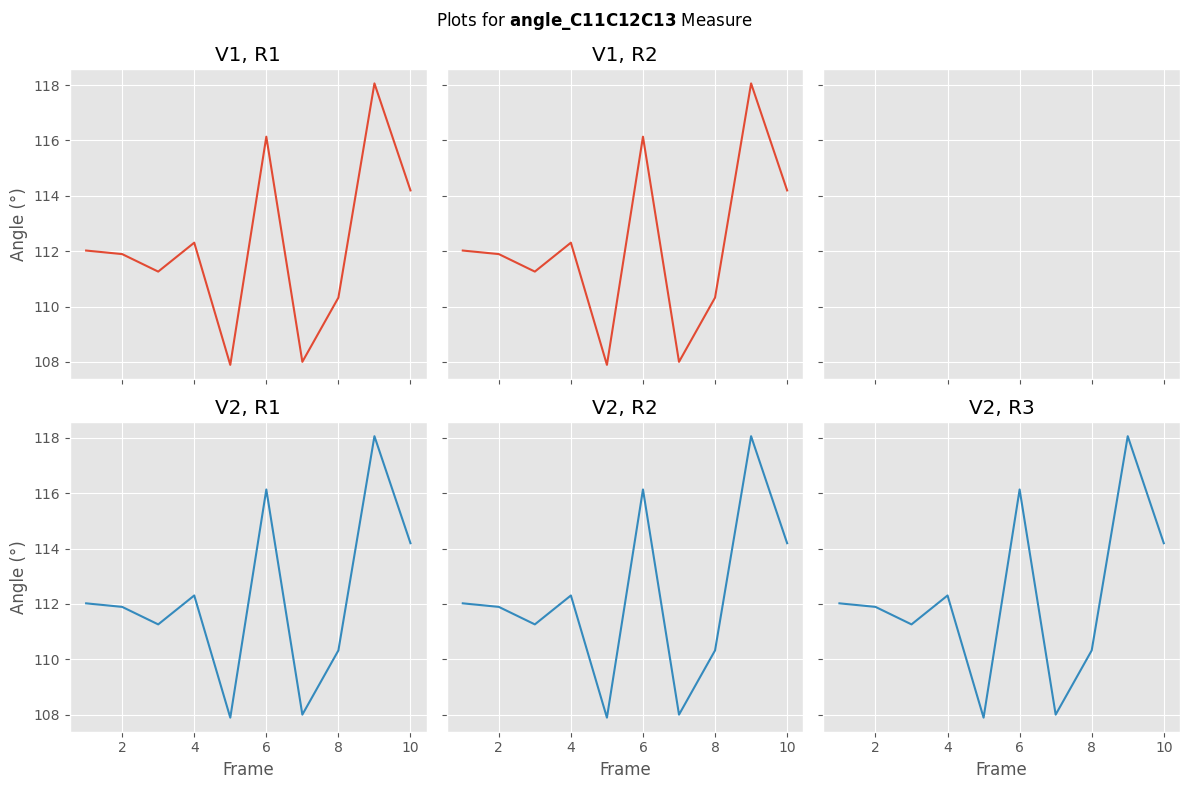

In [25]:
emda.plot_measure(measure_name='angle_C11C12C13', combine_replicas=False, width_per_replica=4)

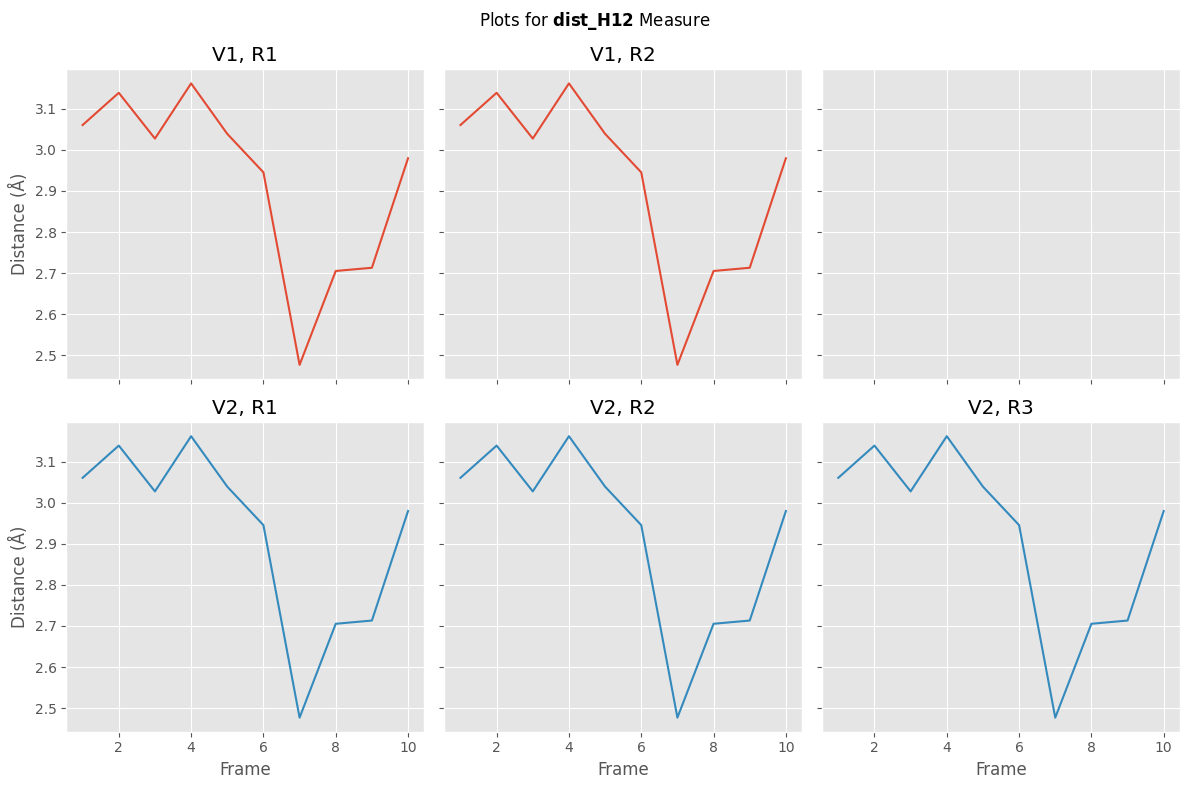

In [26]:
emda.plot_measure(measure_name='dist_H12', combine_replicas=False, width_per_replica=4)

In [32]:
emda.measures['contacts_COO'].result

{'V1': {'R1': [{'PHE174': 4.07980881465334,
    'LEU178': 3.5435824880000375,
    'ARG402': 1.9399333834911683,
    'GLN406': 2.867864767800535,
    'LEU407': 4.24181764223233},
   {'PHE174': 4.455896595913816,
    'LEU178': 3.846655542296566,
    'ARG402': 1.8721405031554508,
    'GLN406': 2.836182864593443},
   {'PHE174': 3.6862194916378637,
    'LEU178': 3.715520736085503,
    'ARG402': 1.9201512013894646,
    'GLN406': 2.5640726493302677},
   {'PHE174': 3.354962442807433,
    'LEU178': 4.178788656048772,
    'ARG402': 1.7512415545636284,
    'GLN406': 2.9398642753949304},
   {'PHE174': 4.025384793512471,
    'LEU178': 4.63404880443787,
    'ARG402': 1.8513383702077701,
    'GLN406': 3.0151037695042144},
   {'PHE174': 3.4324547399133163,
    'LEU178': 3.945263797079792,
    'ARG402': 2.038506539661132,
    'GLN406': 4.038383851048494},
   {'PHE174': 4.49212022346682,
    'LEU178': 4.012908605121049,
    'ARG402': 1.7890444560801069,
    'GLN406': 3.6012789572309187},
   {'PHE174': 3

## Analyse distances, angles and dihedrals

In [27]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)
emda.analyse_value('dihe_C10C11C13C14_bool', 'dihe_C10C11C13C14', 0, 20, mode='tol')

In [28]:
emda.analyse_NACs('dist_dihe_NACs', ['dist_H12_bool', 'dihe_C10C11C13C14_bool'], invert=False)


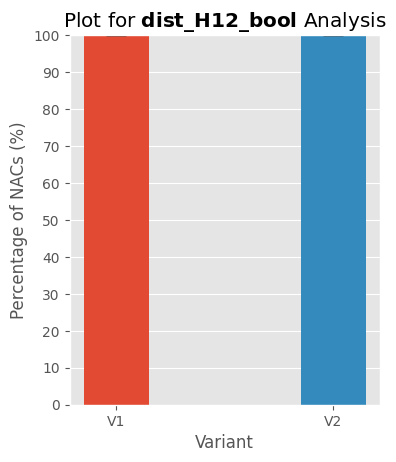

In [30]:
emda.plot_NACs('dist_H12_bool', merge_replicas=True, percentage=True, bar_width=0.1, width=4)

In [34]:
?emda.add_RMSD

Signature:
emda.add_RMSD(
    name,
    sel,
    ref=0,
    center: bool = True,
    superposition: bool = True,
    weights=None,
)
Docstring:
DESCRIPTION:
    This function outputs the RMSD of a selection

INPUT:
    - name:     name of the measurement
    - sel:      selection as EMDA.selection key
    - ref:      reference universe. If not provided, the first frame will be used as the reference.
    - center:   substracts the COM of the selection
    - superposition [bool]: rotates and translates the frame to align the reference. Its activation forces center to be True by MDAnalysis' implementation

OUTPUT:
    - Array of RMSDs of each frame against a reference
File:      ~/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/adders.py
Type:      method

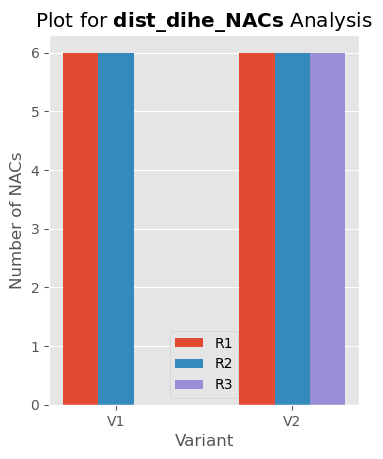

In [31]:
emda.plot_NACs('dist_dihe_NACs', merge_replicas=False, percentage=False, bar_width=0.2)

## Analyse contacts

In [16]:
emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO', percentage=True)

In [19]:
emda.analyses['contacts_COO_freq'].result

{'V1': {'R1': {'PHE174': 100.0,
   'LEU178': 100.0,
   'ARG402': 100.0,
   'GLN406': 100.0,
   'LEU407': 10.0},
  'R2': {'PHE174': 100.0,
   'LEU178': 100.0,
   'ARG402': 100.0,
   'GLN406': 100.0,
   'LEU407': 10.0}},
 'V2': {'R1': {'PHE174': 100.0,
   'LEU178': 100.0,
   'ARG402': 100.0,
   'GLN406': 100.0,
   'LEU407': 10.0},
  'R2': {'PHE174': 100.0,
   'LEU178': 100.0,
   'ARG402': 100.0,
   'GLN406': 100.0,
   'LEU407': 10.0},
  'R3': {'PHE174': 100.0,
   'LEU178': 100.0,
   'ARG402': 100.0,
   'GLN406': 100.0,
   'LEU407': 10.0}}}

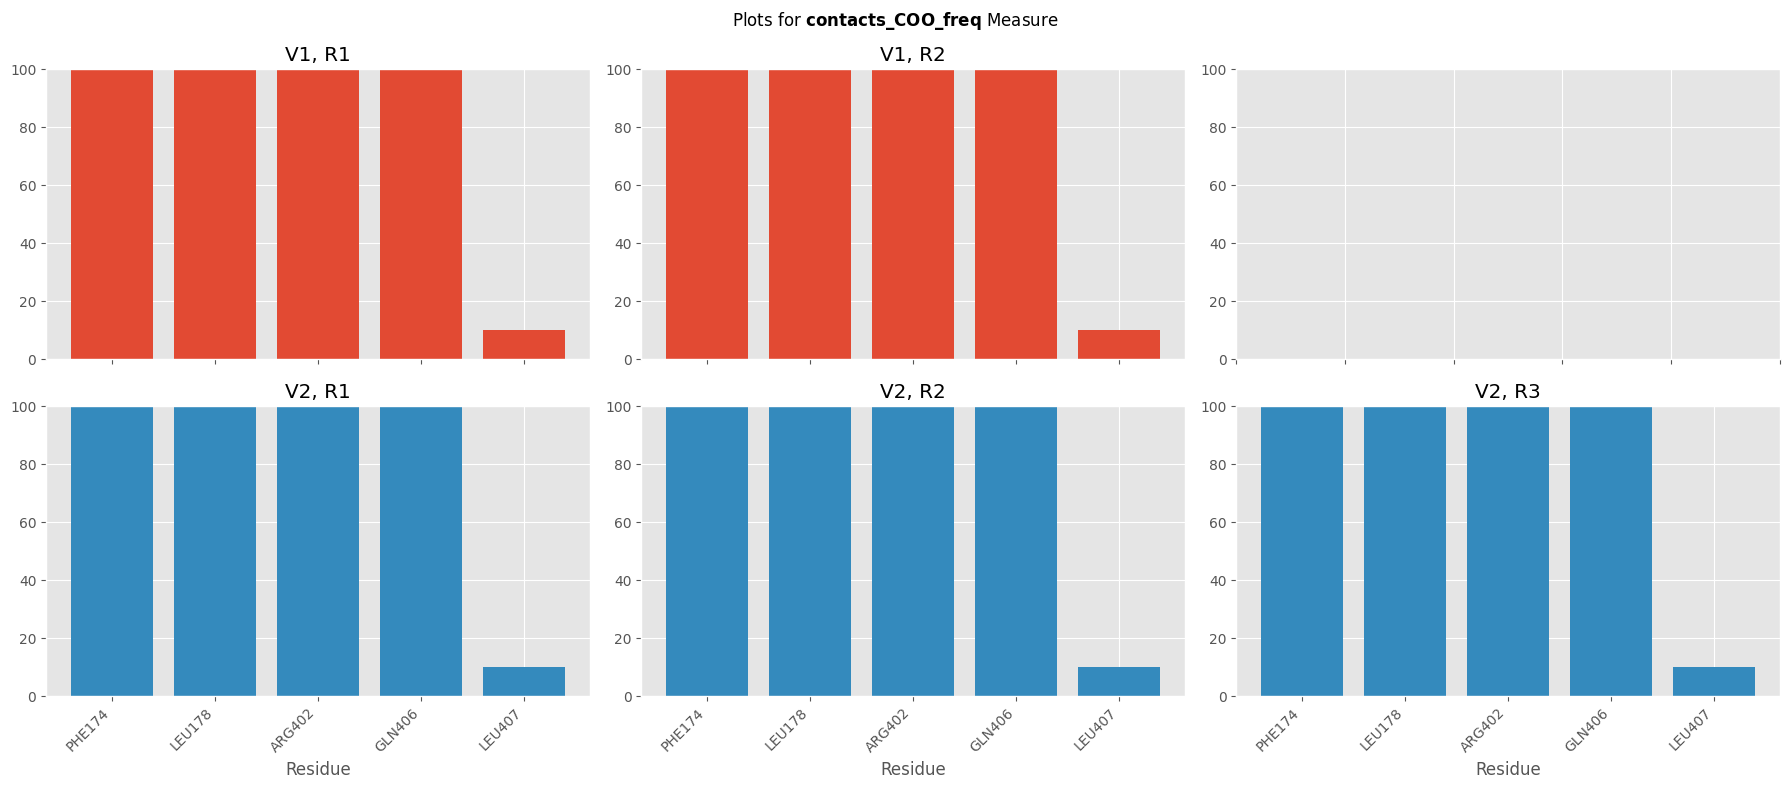

In [17]:
# plotting from plotter
emda.plot_contacts_frequency('contacts_COO_freq', width_per_replica=6, same_x=False, same_y=False, merge_replicas=False, bar_width=0.8)

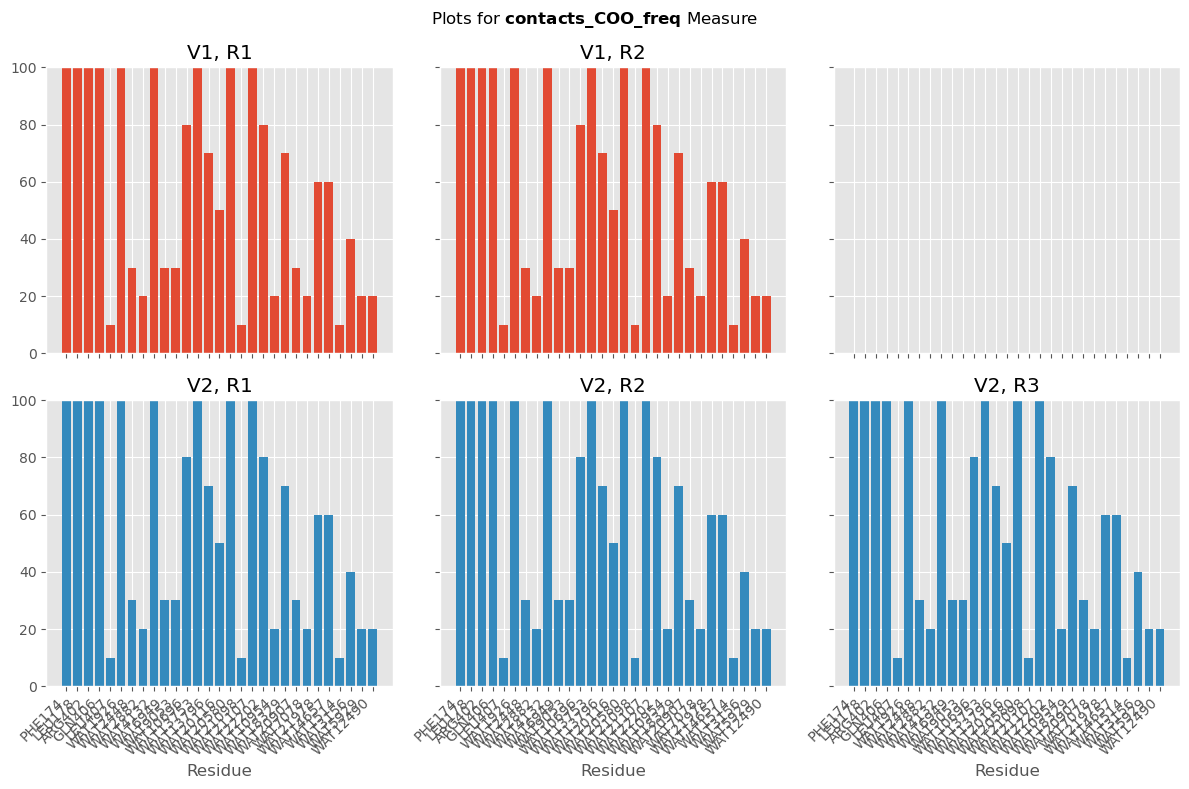

In [36]:
# plotting from Analysis' plot method
emda.analyses['contacts_COO_freq'].plot()

In [10]:
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

In [43]:
emda.analyses['contacts_COO_amount'].options

{'mode': 'contacts'}

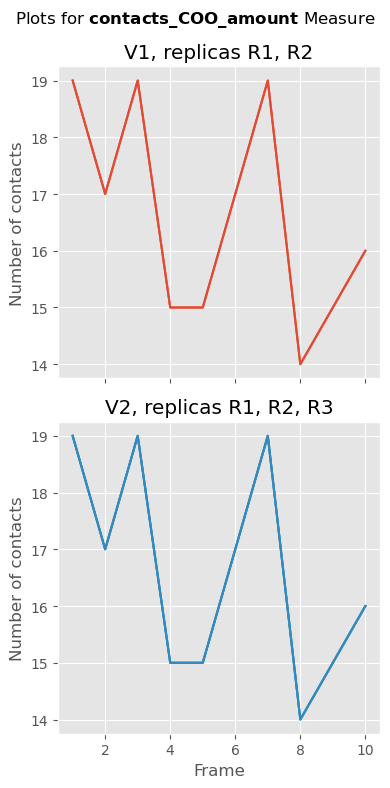

In [41]:
emda.analyses['contacts_COO_amount'].plot(merge_replicas=True)

In [38]:
# The Analysis' plot method nor the plot_measure plotter are compatible yet
emda.analyses['contacts_prot_amount'].plot()

NotCompatibleAnalysisForPlotterError: The input analysis is not compatible with the chosen plotter.